# 1. Import MAGNets package

In [1]:
import magnets.reduction as mg

# 2. Remove all nodes connected in series

### <span style="color:red">Inputs </span>

In [2]:
inp_file = 'networks/ky2.inp'
op_pt = 0
max_nodal_degree = 2

### <span style="color:red">Reduction </span>

In [3]:
import time

t1 = time.time()
wn2 = mg.reduce_model(inp_file, 
                      op_pt = op_pt,
                      max_nodal_degree = max_nodal_degree)  
t2 = time.time()
print('Reduction Time: ', t2 - t1, ' s')

Reduction Time:  1.6047213077545166  s


### <span style="color:red">Plotting </span>

Text(0.5, 1.0, 'Partially reduced model: 459 junctions')

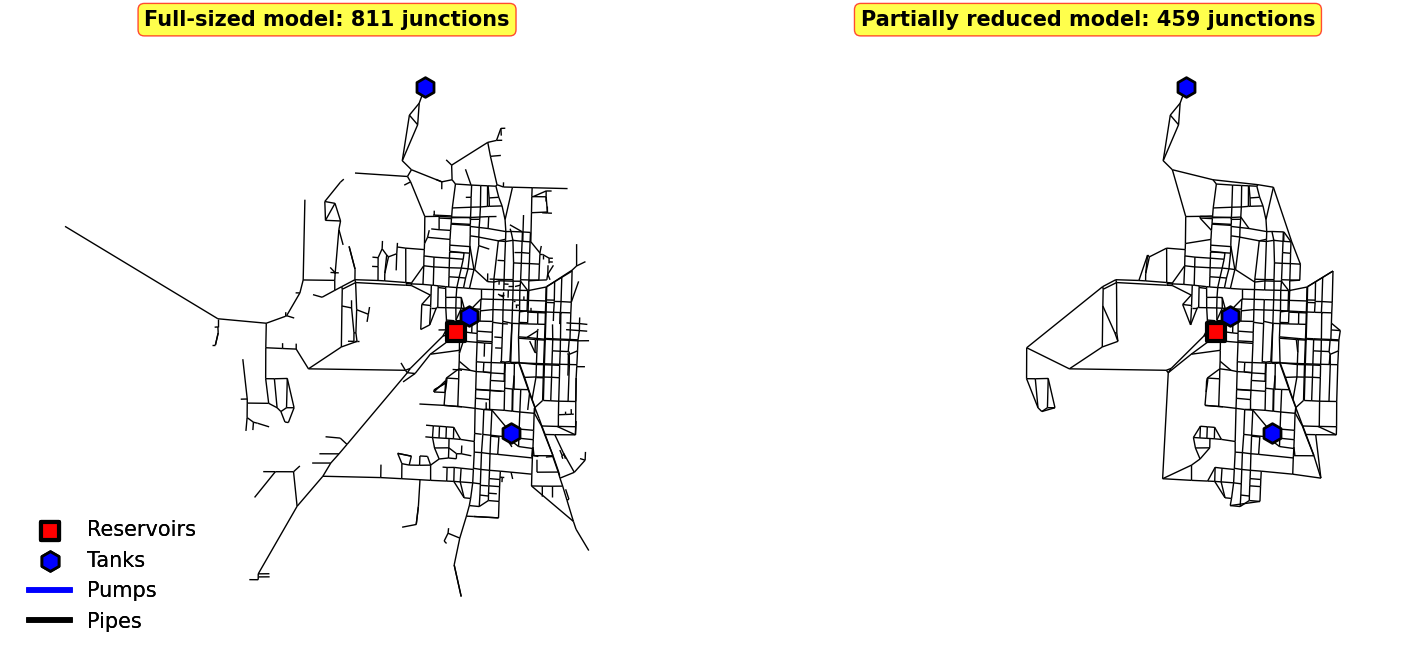

In [4]:
import matplotlib.pyplot as plt
import viswaternet as vis
import wntr

wn = wntr.network.WaterNetworkModel(inp_file)
inp_file2 = 'networks/reduced 0 ky2.inp'
model = vis.VisWNModel(inp_file)
model2 = vis.VisWNModel(inp_file2)

fig, ax = plt.subplots(1,2,figsize = (18,8))
model.plot_basic_elements(ax=ax[0], legend_loc = 'lower left', reservoir_color ='r', nodes = False)
model2.plot_basic_elements(ax=ax[1], legend = False, reservoir_color ='r', nodes = False)
plt.setp(ax[1], ylim=ax[0].get_ylim())
plt.setp(ax[1], xlim=ax[0].get_xlim())
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_title('Full-sized model: ' + str(wn.num_junctions) + ' junctions', 
                fontsize = 15, fontweight = 'bold',bbox=dict(facecolor='yellow', alpha = 0.7, edgecolor='r', boxstyle='round'))
ax[1].set_title('Partially reduced model: ' + str(wn2.num_junctions) + ' junctions', 
                fontsize = 15, fontweight = 'bold',bbox=dict(facecolor='yellow', alpha = 0.7, edgecolor='r', boxstyle='round'))

# 3. Remove all nodes except nodes of interest

### <span style="color:red">Inputs </span>

In [5]:
inp_file = 'networks/ky2.inp'
op_pt = 0
nodes_to_keep = ['J-27', 'J-136']

### <span style="color:red">Reduction </span>

In [6]:
t1 = time.time()

wn2 = mg.reduce_model(inp_file, 
                      op_pt = op_pt,
                      nodes_to_keep = nodes_to_keep)  

t2 = time.time()
print('Reduction Time: ', t2 - t1, ' s')

Reduction Time:  4.715484619140625  s


### <span style="color:red">Plotting </span>

Text(0.5, 1.0, 'Fully reduced model: 7 junctions')

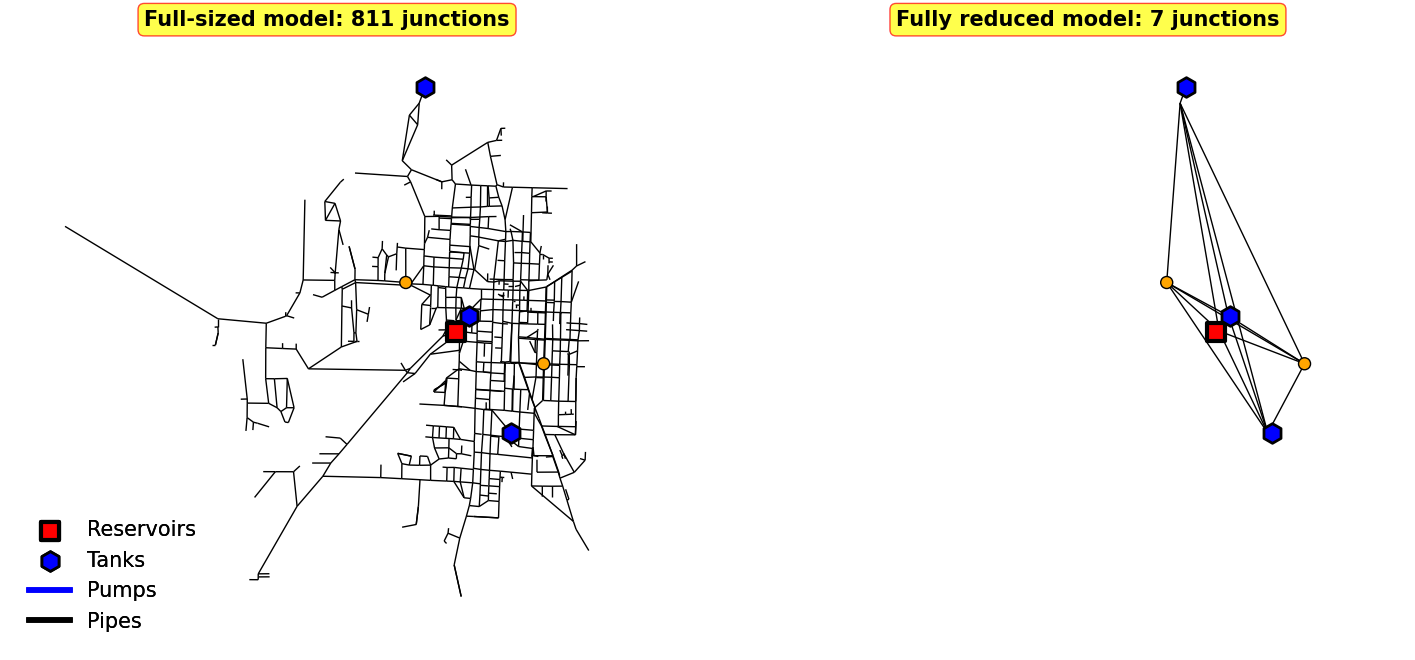

In [7]:
model = vis.VisWNModel(inp_file)
model2 = vis.VisWNModel(inp_file2)
inp_file2 = 'networks/reduced 0 ky2.inp'

fig, ax = plt.subplots(1,2,figsize = (18,8))
model.plot_basic_elements(ax=ax[0], legend_loc = 'lower left', reservoir_color ='r', nodes = False)
model2.plot_basic_elements(ax=ax[1], legend = False, reservoir_color ='r', nodes = False)
model.draw_nodes(ax=ax[0], node_list = nodes_to_keep, 
                 node_size = 300, node_color = 'orange', edge_colors = 'k', line_widths = 1)
model2.draw_nodes(ax=ax[1], node_list = nodes_to_keep, 
                 node_size = 300, node_color = 'orange', edge_colors = 'k', line_widths = 1)
plt.setp(ax[1], ylim=ax[0].get_ylim())
plt.setp(ax[1], xlim=ax[0].get_xlim())
plt.setp(ax[1], ylim=ax[0].get_ylim())
plt.setp(ax[1], xlim=ax[0].get_xlim())
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_title('Full-sized model: ' + str(wn.num_junctions) + ' junctions', 
                fontsize = 15, fontweight = 'bold',bbox=dict(facecolor='yellow', alpha = 0.7, edgecolor='r', boxstyle='round'))
ax[1].set_title('Fully reduced model: ' + str(wn2.num_junctions) + ' junctions', 
                fontsize = 15, fontweight = 'bold',bbox=dict(facecolor='yellow', alpha = 0.7, edgecolor='r', boxstyle='round'))